In [1]:
import numpy as np
import torch
import copy
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
datasets_path = "~/datasets"

with_cuda = torch.cuda.is_available()
if with_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Reminders on a toy dataset

## Building the dataset

In [3]:
def generate_image(height, width):
    img = torch.zeros((1, height, width), device = device)
    j_pos = torch.randint(2, width - 2, (1,))
    for i in range(height):
        for j in range(j_pos - 2, j_pos + 2):
            img[0, i, j] = 1
    cl = torch.randint(0, 4, (1,)).item()
    img = transforms.functional.rotate(img, 45*cl)
    return img, cl

**Question 1**

With the class `torch.utils.data.TensorDataset`, build a dataset generated by the function `generate_image`. Show some samples with matplotlib functiob `imshow`.

{'tensors': (tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 1., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 1., 1., 0.],
            [0., 0., 0.,  ..., 1., 1., 0.],
            [0., 0., 0.,  ..., 1., 1., 0.],
            ...,
            [0., 0., 0.,  ..., 1., 1., 0.],
            [0., 0., 0.,  ..., 1., 1., 0.],
            [0., 0., 0.,  ..., 1., 1., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 1.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [

Text(0.5, 1.0, '1')

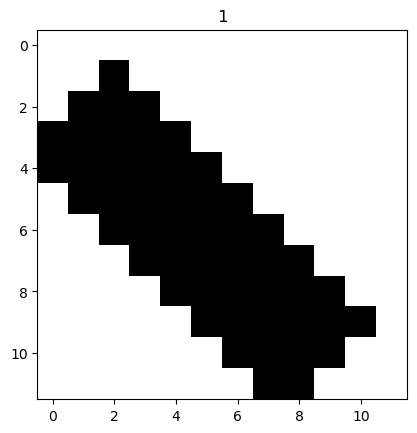

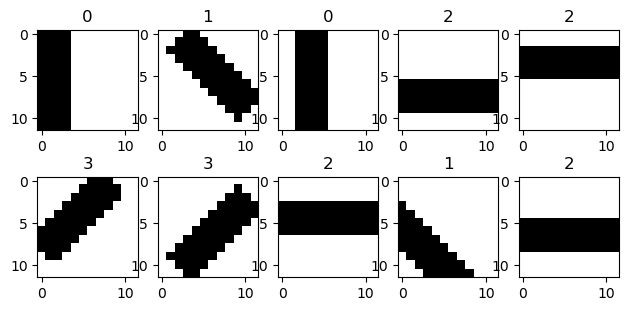

**Question 2**

Put the dataset into a `DataLoader`. What are the differences between a dataset and a data loader?

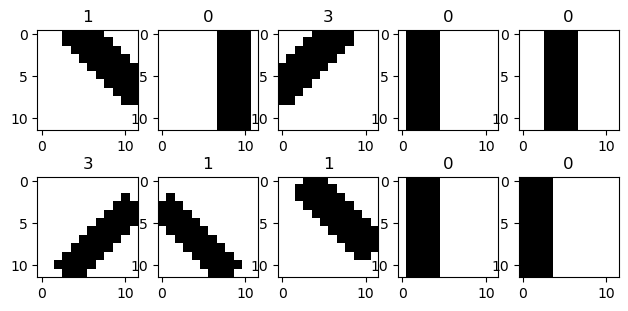

What are Conv2d, Linear and MaxPool?

In a dataset, the elements can be accessed individually given an index (with `[i]`). 

A data loader is an `Iterable`, which means that its elements can only be accessed through an `Iterator` that traverses the dataset in a way that is provided by the arguments of the data loader (batch size, random/deterministic choice of the data points, etc.). In particular, it can be traversed with a `for` loop.

## Simple NN/training

**Question 3**

Write a neural network that classifies the data points previously generated. One can use a convolutional and a fully-connected layer.

What are the parameters of a convolutional layer? What is their shape?

In [10]:
class SmallCVNN(nn.Module):
    def __init__(self):
        super(SmallCVNN, self).__init__()

    def forward(self, x):
        pass

Parameters: `conv.bias`, `conv.weight`.

`conv.bias`: size `out_channels`

`conv.weight`: size `out_channels` * `in_channels` * `kernel_height` * `kernel_width`

tensor([[-1.6216, -1.3468, -1.3289, -1.2817],
        [-1.5000, -1.3902, -1.2925, -1.3734],
        [-1.5125, -1.1757, -1.4440, -1.4478],
        [-1.4703, -1.3001, -1.3237, -1.4632],
        [-1.6112, -1.1840, -1.3571, -1.4402],
        [-1.5374, -1.3703, -1.2465, -1.4126],
        [-1.3149, -1.0962, -1.5526, -1.6837],
        [-1.5843, -1.3904, -1.3660, -1.2351],
        [-1.4703, -1.3001, -1.3237, -1.4632],
        [-1.5183, -1.3046, -1.3550, -1.3796]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)

In [13]:
def train_model(model, criterion, optimizer, nepochs):
    #List to store loss to visualize
    train_losses = []
    train_acc = []
    start_epoch = 0

    for epoch in range(start_epoch, nepochs):
        train_loss = 0.
        valid_loss = 0.
        correct = 0

        model.train()
        for batch_idx, (data, target) in enumerate(data_loader):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)

            # calculate the batch loss
            loss = criterion(output, target)

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # perform a single optimization step (parameter update)
            optimizer.step()

            # update training loss
            train_loss += loss.item() * data.size(0)
            
            # accuracy
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum().item()

        # calculate average losses
        train_loss = train_loss/len(data_loader.dataset)
        accuracy = correct/len(data_loader.dataset)*100
        train_acc.append(accuracy)
        train_losses.append(train_loss)

        # print losses statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tTraining accuracy: {:.6f}'.format(
            epoch, train_loss, accuracy))

**Question 4**

Choose the loss and train the NN. Why do we choose to minimize the loss instead of maximizing the accuracy?

Epoch: 0 	Training Loss: 1.276646 	Training accuracy: 45.700000
Epoch: 1 	Training Loss: 0.809702 	Training accuracy: 81.600000
Epoch: 2 	Training Loss: 0.416870 	Training accuracy: 93.100000
Epoch: 3 	Training Loss: 0.228877 	Training accuracy: 98.100000
Epoch: 4 	Training Loss: 0.130561 	Training accuracy: 99.300000
Epoch: 5 	Training Loss: 0.078608 	Training accuracy: 100.000000
Epoch: 6 	Training Loss: 0.050217 	Training accuracy: 100.000000
Epoch: 7 	Training Loss: 0.034131 	Training accuracy: 100.000000
Epoch: 8 	Training Loss: 0.024575 	Training accuracy: 100.000000
Epoch: 9 	Training Loss: 0.018444 	Training accuracy: 100.000000


The derivative of the accuracy w.r.t. the parameters of the NN is zero, so the NN cannot be trained with this "loss".

# Variational Auto-Encoders (VAE): MNIST and FashionMNIST

## Building a standard fully-connected VAE

**Question 1**

Complete the class `VAE_FC`:
 * build an encoder module;
 * build a decoder module;
 * write the method `encode`, which takes an input `x` and returns means and log-variances;
 * write the method `decode`, which takes a random variable `z` and returns the reconstructed image;
 * write the method `reparameterization`, taking means and variances and returning normal samples with these means and variances;
 * write the method `forward`, which takes an input `x` and returns its reconstruction `x_hat`, and the mean/variance of the latent representation.

Additionally:
 * write the method `sample`, which generates new data;
 * write the method `reconstruct`, which attempts to reconstruct the input.

In [29]:
batch_size = 128
#mean, std = .2860, .3530

# build transform
transform = transforms.Compose([
    transforms.ToTensor(),
    ]) 

# choose the training and test datasets
train_data = datasets.MNIST(datasets_path, train = True,
                              download = True, transform = transform)
test_data = datasets.MNIST(datasets_path, train=False,
                             download = True, transform = transform)

train_size = len(train_data)
test_size = len(test_data)

# build the data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)

# specify the image classes
classes = [f"{i}" for i in range(10)]

In [30]:
class VAE_FC(nn.Module):
    def __init__(self, layers, latent_dim = 200, leak = .1):
        super(VAE_FC, self).__init__()
        
        self.layers = layers
        self.latent_dim = latent_dim
        
        # encoder
        
        # latent mean and variance
        self.fc_mean = nn.Linear(layers[-1], latent_dim)
        self.fc_logvar = nn.Linear(layers[-1], latent_dim)
        
        # decoder input
     
    def encode(self, x):
        pass

    def reparameterization(self, mean, logvar):
        pass

    def decode(self, x):
        pass

    def forward(self, x):
        pass
    
    def sample(self, num_samples):
        pass
    
    def reconstruct(self, x):
        pass

**Question 2**

Write the function `build_loss_vae`, which builds the loss function for the VAE. The reconstruction loss and the KL loss will be balanced by two parameters `lambda_reconstruct` and `lambda_kl` (by default, they are equal to 0.5).

## Training

In [32]:
def train_model_vae(data_loader, model, criterion, optimizer, nepochs):
    #List to store loss to visualize
    train_losses = []
    train_acc = []
    start_epoch = 0

    for epoch in range(start_epoch, nepochs):
        train_loss = 0.
        valid_loss = 0.
        correct = 0

        model.train()
        for batch_idx, (input_, target) in enumerate(data_loader):
            input_ = input_.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()

            # forward pass: compute predicted outputs by passing inputs to the model
            # ...

            # calculate the batch loss
            # ...

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # perform a single optimization step (parameter update)
            optimizer.step()

            # update training loss
            train_loss += loss.item() * input_.size(0)

        # calculate average losses
        train_loss = train_loss/len(data_loader.dataset)
        train_losses.append(train_loss)

        # print losses statistics 
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, train_loss))

**Question 3**

Train the VAE on MNIST or FashionMNIST. Don't forget to save it!

Epoch: 0 	Training Loss: 3373.748217
Epoch: 1 	Training Loss: 2970.038042
Epoch: 2 	Training Loss: 2703.530285
Epoch: 3 	Training Loss: 2539.196261
Epoch: 4 	Training Loss: 2388.743295
Epoch: 5 	Training Loss: 2291.263003
Epoch: 6 	Training Loss: 2237.036746
Epoch: 7 	Training Loss: 2200.259400
Epoch: 8 	Training Loss: 2167.847724
Epoch: 9 	Training Loss: 2142.533549
Epoch: 10 	Training Loss: 2119.353135
Epoch: 11 	Training Loss: 2097.041363
Epoch: 12 	Training Loss: 2080.970773
Epoch: 13 	Training Loss: 2065.284740
Epoch: 14 	Training Loss: 2053.394636
Epoch: 15 	Training Loss: 2037.921570
Epoch: 16 	Training Loss: 2029.095493
Epoch: 17 	Training Loss: 2018.861997
Epoch: 18 	Training Loss: 2010.588728
Epoch: 19 	Training Loss: 2002.453106
Epoch: 20 	Training Loss: 1992.502951
Epoch: 21 	Training Loss: 1987.536639
Epoch: 22 	Training Loss: 1982.345923
Epoch: 23 	Training Loss: 1974.064767
Epoch: 24 	Training Loss: 1969.208767
Epoch: 25 	Training Loss: 1966.913670
Epoch: 26 	Training Lo

**Question 4**

With the resulting model:
 * show some generated samples;
 * check the quality of the reconstruction;
 * show some interpolations between images.

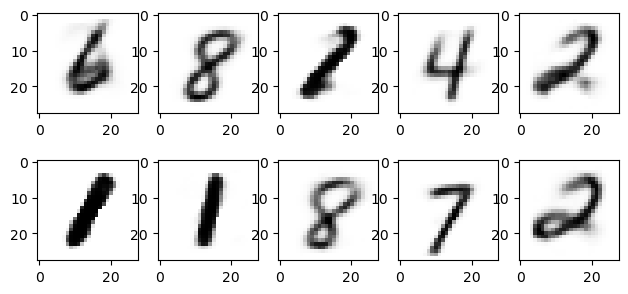

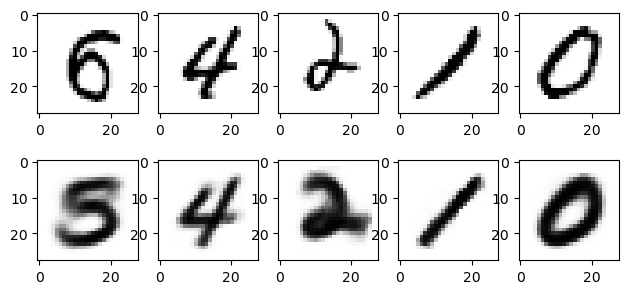

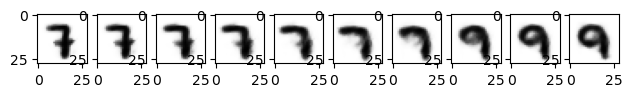

## Conditional VAE

**Question 5**

Modify the VAE to build a conditional VAE:
 * the input vectors should be enriched with a one-hot vector coding for the class;
 * went sent to the decoder, the latent representation should be enriched with a one-hot vector coding for the class.

Modify also the function `train_model_vae`.

In [54]:
def train_model_vae(data_loader, model, criterion, optimizer, nepochs, cond = False):
    #List to store loss to visualize
    train_losses = []
    train_acc = []
    start_epoch = 0

    for epoch in range(start_epoch, nepochs):
        train_loss = 0.
        valid_loss = 0.
        correct = 0

        model.train()
        for batch_idx, (input_, target) in enumerate(data_loader):
            input_ = input_.to(device)
            target = target.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()

            # forward pass: compute predicted outputs by passing inputs to the model
            if cond:
                # ...
            else:
                # ...

            # calculate the batch loss
            loss = criterion(input_, output_, mean, logvar)

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()

            # perform a single optimization step (parameter update)
            optimizer.step()

            # update training loss
            train_loss += loss.item() * input_.size(0)

        # calculate average losses
        train_loss = train_loss/len(data_loader.dataset)
        train_losses.append(train_loss)

        # print losses statistics 
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, train_loss))

**Question 6**

Train the model.

With the resulting model:
 * show some generated samples;
 * check the quality of the reconstruction;
 * show some interpolations between images.

Epoch: 0 	Training Loss: 2918.475994
Epoch: 1 	Training Loss: 2191.077589
Epoch: 2 	Training Loss: 2065.908277
Epoch: 3 	Training Loss: 1966.447010
Epoch: 4 	Training Loss: 1911.137184
Epoch: 5 	Training Loss: 1880.474591
Epoch: 6 	Training Loss: 1859.746484
Epoch: 7 	Training Loss: 1841.941008
Epoch: 8 	Training Loss: 1830.975653
Epoch: 9 	Training Loss: 1819.461128
Epoch: 10 	Training Loss: 1810.313565
Epoch: 11 	Training Loss: 1803.669359
Epoch: 12 	Training Loss: 1796.326537
Epoch: 13 	Training Loss: 1789.080835
Epoch: 14 	Training Loss: 1782.192253
Epoch: 15 	Training Loss: 1776.980255
Epoch: 16 	Training Loss: 1773.107290
Epoch: 17 	Training Loss: 1766.931147
Epoch: 18 	Training Loss: 1761.392018
Epoch: 19 	Training Loss: 1757.696942
Epoch: 20 	Training Loss: 1753.103161
Epoch: 21 	Training Loss: 1750.685238
Epoch: 22 	Training Loss: 1744.678856
Epoch: 23 	Training Loss: 1744.090000
Epoch: 24 	Training Loss: 1740.171354
Epoch: 25 	Training Loss: 1736.228558
Epoch: 26 	Training Lo

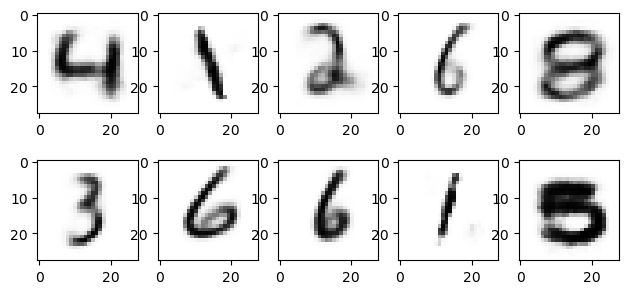

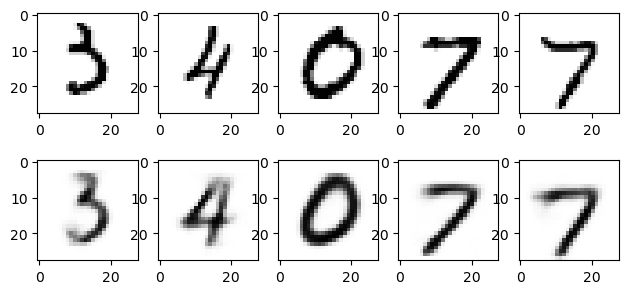

RuntimeError: Tensors must have same number of dimensions: got 1 and 3